# Evaluation of regression and classification models : effect of outliers

This code is a complement to PyTerK environment notebooks. It allows to gather all desired model evaluation in a table, using similar method than PyTerK. 

In this notebook, we are evaluating models assessed in [Evaluation_tables_model_assessement](./Evaluation_tables_model_assessement.ipynb) on different datasets. The train data, test data and models are loaded for each iteration and k-folds. Predictions are performed from train data. Extected and predicted values are stored.

Regression models are evaluatied through adjusted $R^2$ of the regression between expected and predicted values. For adjusted $R^2$, the size of the dataset correspond to ```len(y_pred)```and the number of independant variables is 1 as predicted values are supposed to be equal to expected values. 

___________________________________________________________________________________________________________________________________

*Example of tree structure obtained from training of best Neural Network (NN), Random Forest (RF) and SVM regression and classification models, for different ouputs and different datasets. Note that for an easier PyTerK use NN training should be seperated from RF and SVM*

* campaign09r : regression models 
    * Fit_E : output of the model
        * Fit_E_0000 : model n°1 dataset n°1   _eg: RF on Raw data_
        * Fit_E_0001 : model n°2 dataset n°1   _eg: NN on Raw data_
        * Fit_E_0002 : model n°3 dataset n°1   _eg: SVM on Raw data_
        * Fit_E_0003 : model n°1 dataset n°2   _eg: RF on Statistically processed data_
        * Fit_E_0004 : model n°2 dataset n°2   _eg: NN on Statistically processed data_
        * Fit_E_0005 : model n°3 dataset n°2   _eg: SVM on Statistically processed data_
    * Fit_H
    * Fit_CI
    * Fit_IQ 
* campaign09c: classification models
    * Class_EBSD
        * Class_EBSD_0000 : model n°1 *eg: RF on Averaged_data*
        * Classe_EBSD_0001 : model n°2 *eg: SVM on Averaged_data*
    * Class_XRD
* campaign09cNN: classification models
    * Class_EBSD
        * Class_EBSD_0000 : model n°1 *eg: NN on Averaged_data*
    * Class_XRD


## Import libraries 

In [55]:
import numpy as np
import os, json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss

import sys


sys.path.append('../PyTerK')
import pyterk.config as config
mplstyle=config._pyterk_path('/pyterk.mplstyle')

## Regression models

### Get path to stored results of iterative k-fold crossvalidation trainings of the models on different outputs (`fit`) on different datasets

In [75]:
path='/Users/elisegarel/Desktop/THESE/PUBLI_CONF/PUBLICATION/datasets/BINAIRES/'

validation_RF=pd.read_csv(path+"no_bin_added/validation_RF_mechanical_model.csv", header=0, names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','E','H','C','x',"deltaH","E2H" ])
validation_NN=pd.read_csv(path+"no_bin_added/validation_NN_mechanical_model.csv",header=0,names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','E','H','C','x',"deltaH","E2H" ])

validation_RF_moy=pd.read_csv(path+"no_bin_added/validation_RF_moy_mechanical_model.csv",header=0,names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','E','H','C','x',"deltaH","E2H" ])
validation_NN_moy=pd.read_csv(path+"no_bin_added/validation_NN_moy_mechanical_model.csv",header=0,names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','E','H','C','x',"deltaH","E2H" ])

validation_RF_1binary=pd.read_csv(path+"add1binary/validation/validation_RF_with1binary_mechanical_model.csv",header=0,names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','E','H','C','x',"deltaH","E2H" ])
validation_NN_1binary=pd.read_csv(path+"add1binary/validation/validation_NN_with1binary_mechanical_model.csv",header=0,names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','E','H','C','x',"deltaH","E2H" ])

validation_RF_moy_1binary=pd.read_csv(path+"add1binary/validation/validation_RF_moy_with1binary_mechanical_model.csv",header=0,names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','E','H','C','x',"deltaH","E2H" ])
validation_NN_moy_1binary=pd.read_csv(path+"add1binary/validation/validation_NN_moy_with1binary_mechanical_model.csv",header=0,names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','E','H','C','x',"deltaH","E2H" ])

validation_RF_2binaries=pd.read_csv(path+"add2binaries/validation/validation_RF_with2binaries_mechanical_model.csv",header=0,names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','E','H','C','x',"deltaH","E2H" ])
validation_NN_2binaries=pd.read_csv(path+"add2binaries/validation/validation_NN_with2binaries_mechanical_model.csv",header=0,names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','E','H','C','x',"deltaH","E2H" ])

validation_RF_moy_2binaries=pd.read_csv(path+"add2binaries/validation/validation_RF_moy_with2binaries_mechanical_model.csv",header=0,names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','E','H','C','x',"deltaH","E2H" ])
validation_NN_moy_2binaries=pd.read_csv(path+"add2binaries/validation/validation_NN_moy_with2binaries_mechanical_model.csv",header=0,names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','E','H','C','x',"deltaH","E2H" ])



validation_exp=pd.read_csv(path+"Data_averaged_validation_mechanical_model.csv",header=0,names=['index', 'sample', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','Zr_m', 'Nb_m', 'Mo_m', 'Ti_m', 'Cr_m','E','H','stdE','stdH','C','x',"deltaH","E2H" ])
display(validation_exp)

index                 sample     Zr   Nb     Mo   Ti   Cr   Zr_m  Nb_m  \
0   compo_23   binaire3-Mo mesure 1  28.73  0.0  71.27  0.0  0.0  27.71   0.0   
1   compo_24   binaire3-Mo mesure 2  24.76  0.0  75.24  0.0  0.0  23.83   0.0   
2   compo_25   binaire3-Mo mesure 3  21.54  0.0  78.46  0.0  0.0  20.70   0.0   
3   compo_26   binaire3-Mo mesure 4  18.91  0.0  81.09  0.0  0.0  18.15   0.0   
4   compo_27   binaire3-Mo mesure 5  15.32  0.0  84.68  0.0  0.0  14.68   0.0   
5   compo_28   binaire3-Mo mesure 6   8.88  0.0  91.12  0.0  0.0   8.48   0.0   
6   compo_29   binaire3-Mo mesure 7   9.60  0.0  90.40  0.0  0.0   9.18   0.0   
7   compo_30   binaire3-Mo mesure 8   6.73  0.0  93.27  0.0  0.0   6.42   0.0   
8   compo_31   binaire3-Mo mesure 9   6.10  0.0  93.90  0.0  0.0   5.82   0.0   
9   compo_32  binaire3-Mo mesure 10   5.29  0.0  94.71  0.0  0.0   5.04   0.0   
10  compo_33  binaire3-Mo mesure 11   4.90  0.0  95.10  0.0  0.0   4.67   0.0   
11  compo_34   binaire3-Zr mesure 1  74.99  0.0  25.01  0.0  0.0  74.03   0.0   
12  compo_35   binaire3-Zr mesure 2  71.36  0.0  28.64  0.0  0.0  70.31   0.0   
13  compo_36   binaire3-Zr mesure 3  67.38  0.0  32.62  0.0  0.0  66.27   0.0   
14  compo_37   binaire3-Zr mesure 4  63.04  0.0  36.96  0.0  0.0  61.85   0.0   
15  compo_38   binaire3-Zr mesure 5  66.93  0.0  33.07  0.0  0.0  65.80   0.0   
16  compo_39   binaire3-Zr mesure 6  53.92  0.0  46.08  0.0  0.0  52.66   0.0   
17  compo_40   binaire3-Zr mesure 7  49.52  0.0  50.48  0.0  0.0  48.26   0.0   
18  compo_41   binaire3-Zr mesure 8  45.23  0.0  54.77  0.0  0.0  43.99   0.0   
19  compo_42   binaire3-Zr mesure 9  40.76  0.0  59.24  0.0  0.0  39.55   0.0   
20  compo_43  binaire3-Zr mesure 10  36.29  0.0  63.71  0.0  0.0  35.13   0.0   
21  compo_44  binaire3-Zr mesure 11  33.25  0.0  66.75  0.0  0.0  32.14   0.0   

     Mo_m  Ti_m  Cr_m           E          H       stdE      stdH         C  \
0   72.29   0.0   0.0  233.678461  10.465969  19.083223  1.139497  1.517823   
1   76.17   0.0   0.0  243.346817  10.936279  10.604584  1.251896  1.511910   
2   79.30   0.0   0.0  276.988004  12.799956  10.527653  0.596926  1.475380   
3   81.85   0.0   0.0  284.195225  12.534533  22.294014  1.303301  1.519410   
4   85.32   0.0   0.0  336.827028  14.269026  61.927613  2.446036  1.545705   
5   91.52   0.0   0.0  322.905252  12.964992  10.118330  0.899779  1.602419   
6   90.82   0.0   0.0  335.902104  11.849433  13.294253  0.534929  1.726889   
7   93.58   0.0   0.0  337.485732  11.216685   8.854699  0.170891  1.784706   
8   94.18   0.0   0.0  342.111100  10.393774   8.087492  0.134122  1.870798   
9   94.96   0.0   0.0  334.573601   9.819610   8.452262  0.022025  1.905280   
10  95.33   0.0   0.0  349.149990   9.404656   5.378968  0.217791  1.984901   
11  25.97   0.0   0.0  119.014246   7.751992   5.676007  0.588097  1.199378   
12  29.69   0.0   0.0   99.298957   6.676266   1.918299  0.019684  1.178493   
13  33.73   0.0   0.0  103.338557   7.104861   1.531065  0.144822  1.156759   
14  38.15   0.0   0.0  113.413361   7.738277   1.176648  0.159474  1.159448   
15  34.20   0.0   0.0  117.160899   8.572064   2.976732  0.141464  1.095338   
16  47.34   0.0   0.0  122.284070   8.888015   1.167810  0.194745  1.098941   
17  51.74   0.0   0.0  128.044022   9.611142   3.441358  0.222820  1.067787   
18  56.01   0.0   0.0  134.613582   9.825393   1.206841  0.186278  1.089726   
19  60.45   0.0   0.0  147.412501  10.297266  17.011957  0.611368  1.123847   
20  64.87   0.0   0.0  150.700515  10.310926   7.677824  1.654165  1.141433   
21  67.86   0.0   0.0  197.075148   9.147380   7.689598  0.676961  1.493273   

           x    deltaH           E2H  
0   1.478746  0.706350   5217.445536  
1   1.474615  0.704703   5414.791722  
2   1.448763  0.695068   5993.954702  
3   1.481086  0.705399   6443.552736  
4   1.501782  0.710239   7950.959496  
5   1.544482  0.723701   8042.257138  
6   1.643478  0.750847   9521.993287  
7   1.691490 

### Calculation of adjusted $R^2$ for each model, datasets and output

0     20.572848
1     19.870104
2    -13.771083
3    -21.240006
4    -69.215974
5    -36.668704
6    -51.767089
7    -24.939355
8    -29.602778
9    -21.739249
10   -36.058211
11    -2.872668
12    17.112302
13    13.072702
14     3.133386
15    -0.707149
16    -9.589557
17    77.878716
18    89.975309
19    92.655361
20    93.184214
21    48.590788
Name: E, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


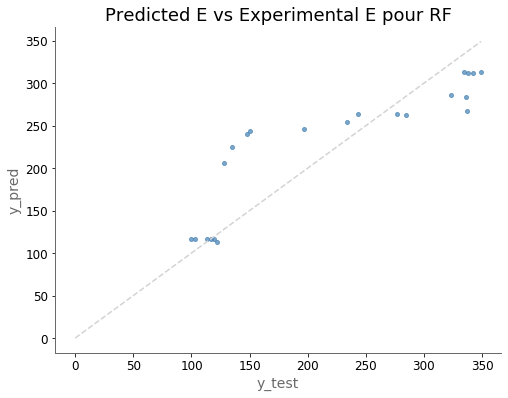

0.7692015813200117
0    -10.004021
1      2.109463
2    -17.274564
3    -13.259495
4    -50.781558
5    -10.107252
6    -26.138924
7    -15.499732
8    -17.306500
9     -5.955531
10   -18.693890
11    -5.201311
12     7.460297
13     4.580263
14   -11.619477
15    -9.366949
16   -41.097540
17   -50.328572
18   -55.738262
19   -38.848891
20    11.058425
21    -3.376748
Name: E, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


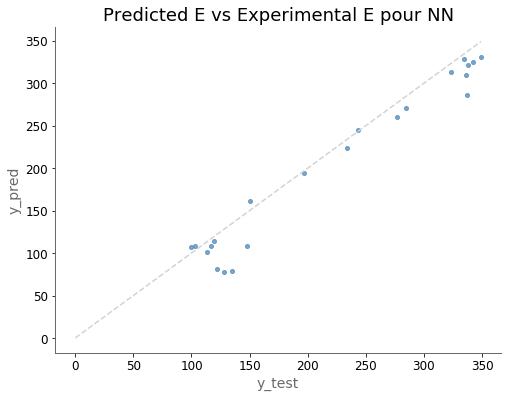

0.9601228228548172
0    -33.459695
1     -2.667817
2    -23.175996
3    -27.341188
4    -73.324360
5    -28.481138
6    -46.452093
7    -25.623860
8    -27.375818
9    -19.688491
10   -32.170976
11    12.451225
12    25.222641
13    17.436597
14     5.424480
15     2.751594
16    -7.491288
17   -19.066343
18   -10.818283
19    11.741730
20    29.716542
21   -12.156994
Name: E, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


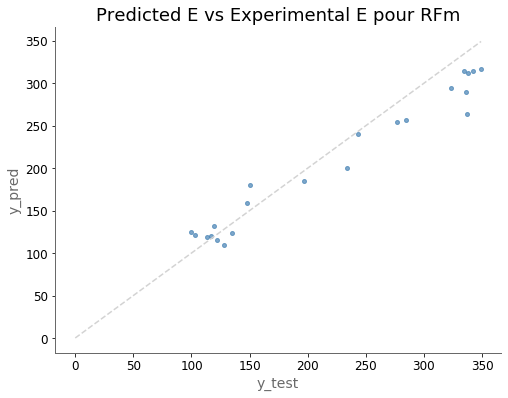

0.9619495849716522
0    -38.708951
1    -23.959477
2    -37.773314
3    -29.806625
4    -61.985508
5    -15.337202
6    -31.481054
7    -20.450272
8    -22.334400
9    -11.193871
10   -23.722470
11    -5.125391
12    13.174573
13     8.846163
14    -0.114381
15    -4.775099
16   -12.546834
17   -15.696717
18   -13.859222
19   -11.185311
20     6.177905
21   -25.431118
Name: E, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


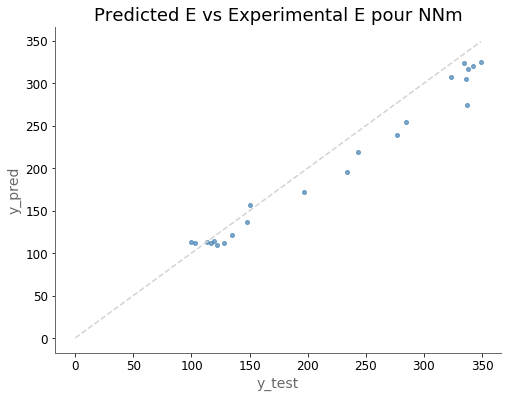

0.9774326410985098
0     -7.450860
1      7.299229
2    -18.934384
3    -25.416258
4    -76.277675
5    -34.366051
6    -51.598871
7    -29.310970
8    -33.928172
9    -25.798215
10   -40.143856
11     9.102725
12    24.168356
13    14.802920
14     5.087138
15     0.980578
16    -4.545385
17    35.050818
18    71.799789
19    64.043908
20    64.451765
21    25.295857
Name: E, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


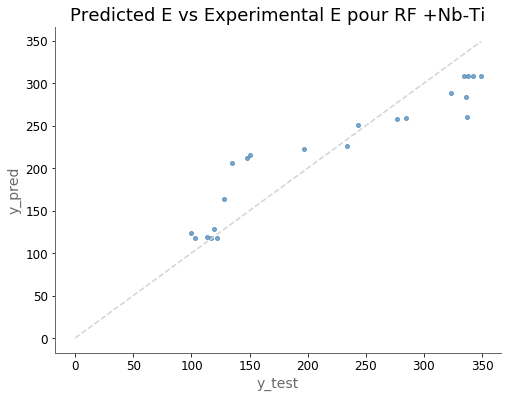

0.8809026792561436
0    -43.281471
1    -34.791317
2    -52.165614
3    -46.066185
4    -80.826758
5    -33.217932
6    -50.086884
7    -36.494672
8    -37.839300
9    -26.083761
10   -38.629190
11    11.435644
12    29.036893
13    22.905118
14    10.807219
15     8.883687
16     1.230740
17    -0.956246
18     1.619788
19     1.552529
20    13.579695
21   -22.337908
Name: E, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


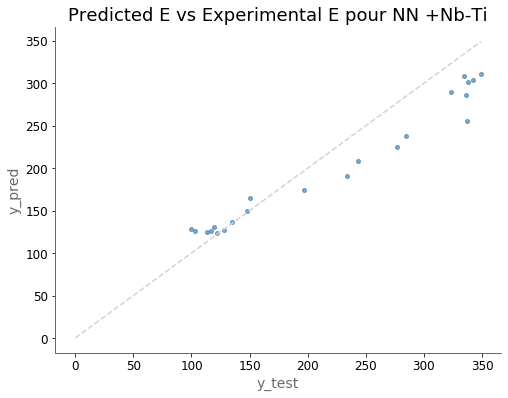

0.9630426683832861
0    -60.177386
1    -53.034647
2    -49.838399
3    -46.927194
4    -85.600923
5    -40.915742
6    -54.729598
7    -29.518594
8    -34.093867
9    -25.930845
10   -40.572704
11    14.441052
12    34.910199
13    21.469985
14    14.337287
15     8.432275
16     2.391391
17     2.454048
18     5.367687
19    11.616811
20    18.907944
21   -23.237922
Name: E, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


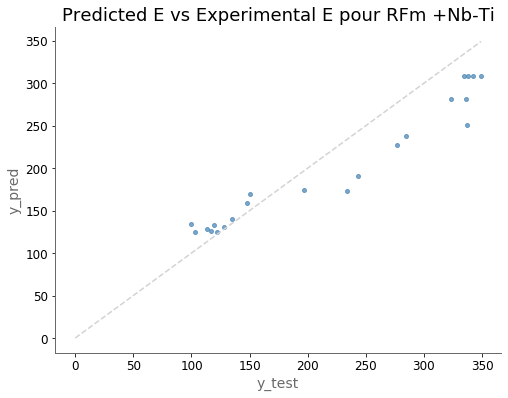

0.9369953822513587
0    -34.603041
1     -9.651337
2    -13.717064
3      0.796195
4    -35.078028
5     -3.552012
6    -18.521424
7    -11.762252
8    -14.385300
9     -4.273371
10   -17.610190
11    -2.077336
12    13.301633
13     4.313779
14   -10.263931
15   -10.024943
16   -25.228290
17   -26.795682
18   -25.421592
19   -20.177721
20     0.759675
21   -28.573688
Name: E, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


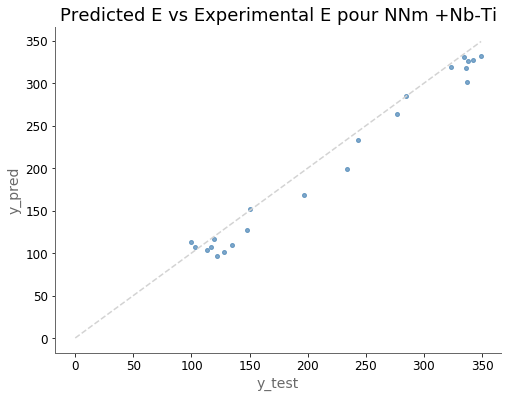

0.9818165149268654
0    -10.347536
1    -12.943459
2    -41.303483
3    -48.510703
4    -93.263636
5    -29.635237
6    -52.440235
7    -33.356435
8    -37.925743
9    -30.388244
10   -45.376098
11     2.720335
12    23.187647
13    10.450793
14     0.624184
15    -3.371548
16   -10.132778
17    61.267359
18    70.986055
19    62.513779
20    63.063937
21    19.882701
Name: E, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


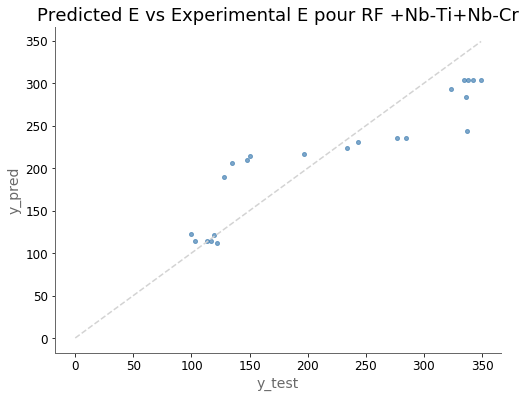

0.8363616019406366
0    -58.079375
1    -31.167791
2    -54.989911
3    -56.928825
4    -86.242369
5    -28.271075
6    -45.553044
7    -31.850969
8    -35.955640
9    -27.802781
10   -41.737712
11    30.722582
12    48.165145
13    26.447445
14    16.864686
15    11.639133
16     1.463952
17     6.775334
18     0.525212
19     2.700352
20    13.167740
21   -29.386797
Name: E, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


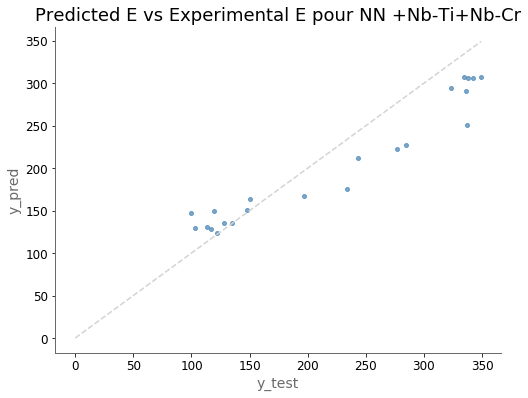

0.9283884188975537
0    -41.777921
1    -29.594467
2    -46.053264
3    -39.029605
4    -72.585728
5    -27.511952
6    -44.059504
7    -31.488572
8    -33.003200
9    -21.466101
10   -34.116850
11    18.145814
12    34.147593
13    25.878593
14    10.365129
15    11.588691
16    -4.230210
17    -8.441322
18    -8.324982
19    -8.540901
20     5.805525
21   -27.602718
Name: E, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


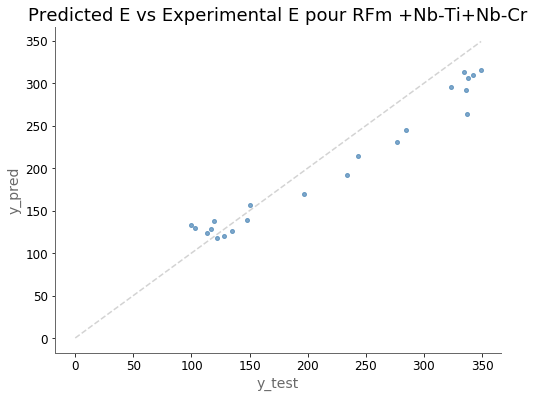

0.9618350388744877
0    -24.444161
1     -6.559597
2    -23.289574
3    -19.599555
4    -57.737628
5    -19.828282
6    -35.434504
7    -26.616862
8    -28.959120
9    -18.487331
10   -31.650790
11     4.377804
12    22.580263
13    17.776387
14     7.060524
15     3.865441
16    -5.793400
17   -15.870062
18   -21.003282
19   -19.017021
20     6.567155
21   -19.209648
Name: E, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


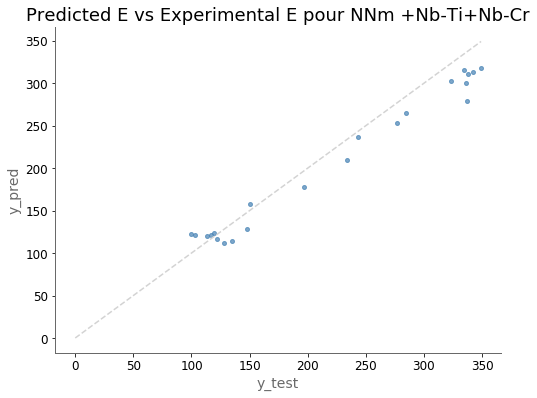

0.9793628757444812
0     1.793288
1     1.322784
2    -0.485654
3    -0.327638
4    -2.142130
5    -1.920518
6    -0.591462
7    -0.885859
8    -0.142808
9     0.368675
10    0.791236
11    2.241207
12    3.314098
13    2.871727
14    2.249366
15    1.404524
16    1.247083
17    1.542878
18    1.633852
19    1.924415
20    2.068728
21    3.088833
Name: H, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


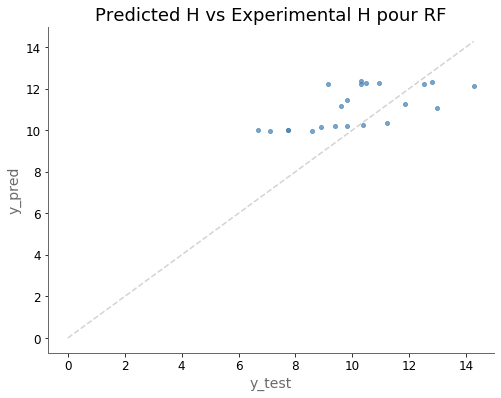

0.3702787995346336
0    -0.767796
1    -0.931821
2    -2.700562
3    -2.354630
4    -4.128517
5    -3.016633
6    -1.879167
7    -1.326865
8    -0.517791
9     0.038228
10    0.443714
11    0.604668
12    1.437975
13    0.745082
14   -0.443913
15   -0.751860
16   -2.002199
17   -2.361233
18   -2.197780
19   -2.133513
20   -1.530669
21    0.025582
Name: H, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


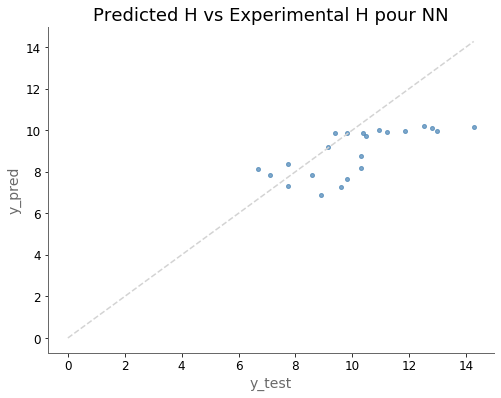

0.49058932153571844
0     1.679799
1     1.061756
2    -0.906116
3    -0.882064
4    -2.976347
5    -2.506674
6    -1.181139
7    -0.907529
8    -0.129232
9     0.398936
10    0.807093
11    2.264634
12    3.321815
13    3.008278
14    2.409551
15    1.541074
16    1.622366
17    2.151684
18    2.081921
19    1.971511
20    1.932521
21    3.099192
Name: H, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


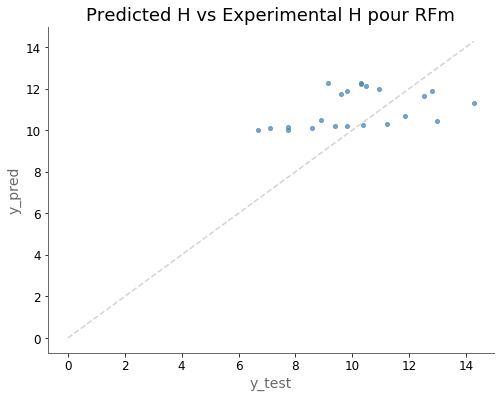

0.12571824707926993
0    -0.129612
1    -0.874305
2    -2.956143
3    -2.993126
4    -4.687809
5    -3.170879
6    -2.111397
7    -1.385994
8    -0.546873
9     0.048551
10    0.472548
11    1.906177
12    2.940049
13    2.539770
14    2.173290
15    1.093897
16    1.797154
17    1.127405
18    0.805861
19    0.223424
20    0.037745
21    1.119016
Name: H, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


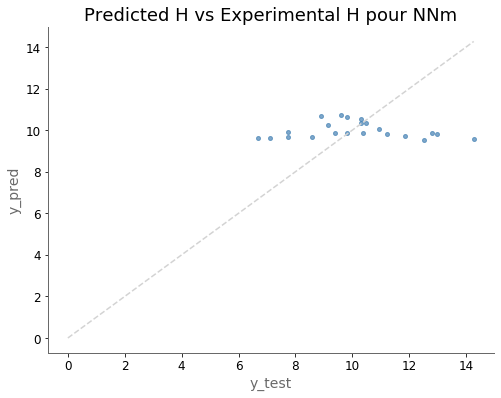

-0.03639941351003073
0     1.645246
1     1.260386
2    -0.499619
3    -0.180208
4    -1.963343
5    -2.009179
6    -0.277354
7    -0.732542
8    -0.030090
9     0.529085
10    0.919341
11    1.841403
12    2.911635
13    2.456843
14    1.850321
15    0.989640
16    0.920026
17    0.408676
18    1.295777
19    1.552117
20    1.806549
21    2.937009
Name: H, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


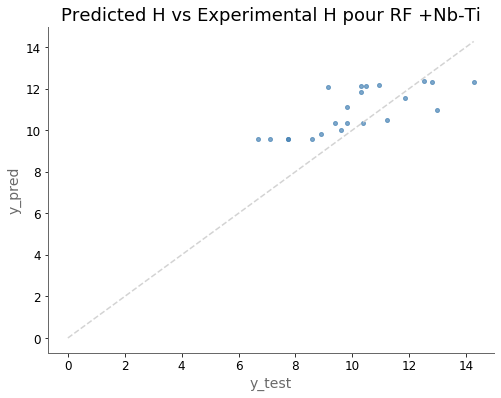

0.5286660358850088
0    -1.414567
1    -1.821212
2    -3.541123
3    -3.130976
4    -4.664746
5    -2.995766
6    -1.921906
7    -1.123549
8    -0.271064
9     0.320194
10    0.728160
11    1.539583
12    2.326440
13    1.715638
14    0.965260
15    0.243603
16   -0.205165
17   -0.953396
18   -1.227097
19   -1.501581
20   -1.419004
21   -0.193399
Name: H, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


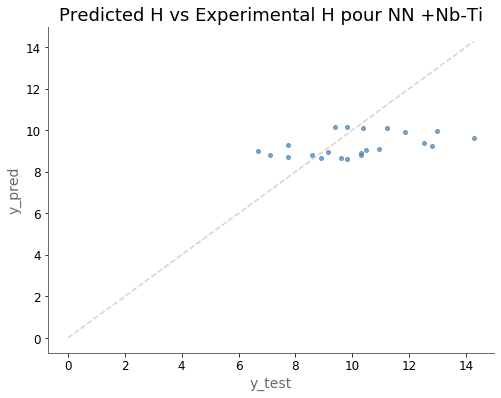

0.17061563848491323
0     1.482163
1     0.951576
2    -0.532069
3    -0.252132
4    -2.261440
5    -2.434737
6    -1.005975
7    -0.686741
8     0.084163
9     0.607275
10    1.026112
11    2.244280
12    3.290863
13    2.852600
14    2.231036
15    1.386387
16    1.196436
17    0.821223
18    0.781096
19    1.113343
20    1.604801
21    2.706134
Name: H, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


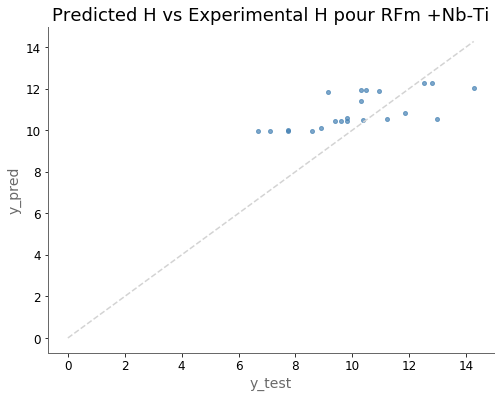

0.434626430315077
0     0.202735
1    -0.281520
2    -2.112784
3    -1.816463
4    -3.698120
5    -2.625112
6    -1.482654
7    -0.942891
8    -0.123978
9     0.460002
10    0.890450
11    0.957438
12    1.862227
13    1.281103
14    0.651946
15   -0.187614
16   -0.380914
17   -0.811282
18   -0.533639
19   -0.445629
20   -0.068225
21    1.230094
Name: H, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


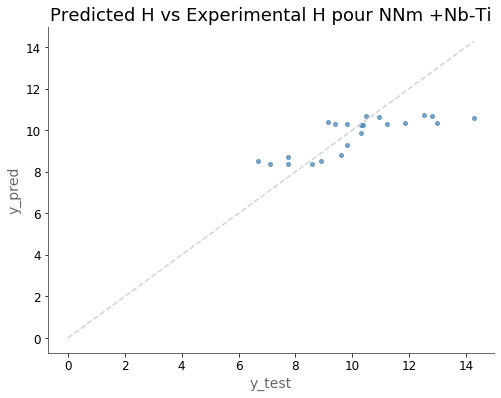

0.6143320533426011
0     1.624276
1     1.126104
2    -0.624600
3    -0.425360
4    -2.279941
5    -2.150981
6    -0.798803
7    -0.915888
8    -0.100058
9     0.456530
10    0.881937
11    1.988157
12    3.099528
13    2.648833
14    2.023972
15    1.181630
16    1.016110
17    1.110729
18    1.270297
19    1.729773
20    1.942128
21    2.941737
Name: H, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


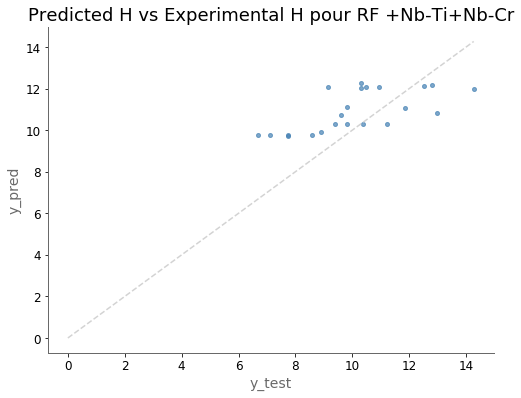

0.4099999234975671
0     1.383276
1     1.085026
2    -0.792651
3    -0.536856
4    -2.720518
5    -2.440209
6    -1.116907
7    -0.948583
8    -0.146401
9     0.388418
10    0.811138
11    2.224987
12    3.289366
13    2.860771
14    2.238400
15    1.393567
16    1.007958
17    0.658880
18    1.005228
19    0.982608
20    1.608320
21    2.764822
Name: H, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


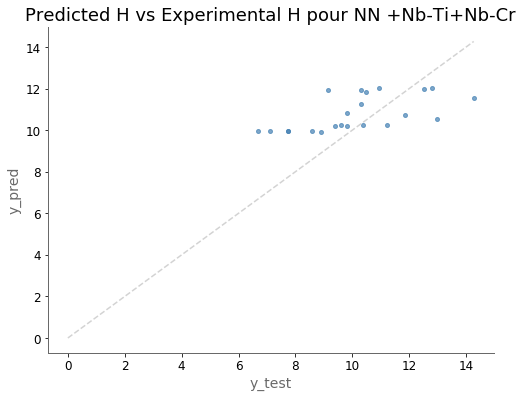

0.32776465716390457
0    -0.670954
1    -1.161334
2    -2.948760
3    -2.804648
4    -5.105046
5    -3.372993
6    -2.302415
7    -1.525611
8    -0.672532
9    -0.056870
10    0.377983
11    0.377826
12    1.220464
13    0.579962
14    0.225133
15   -0.878480
16   -0.270071
17   -0.762822
18   -0.712809
19   -0.788424
20   -0.358239
21    0.879588
Name: H, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


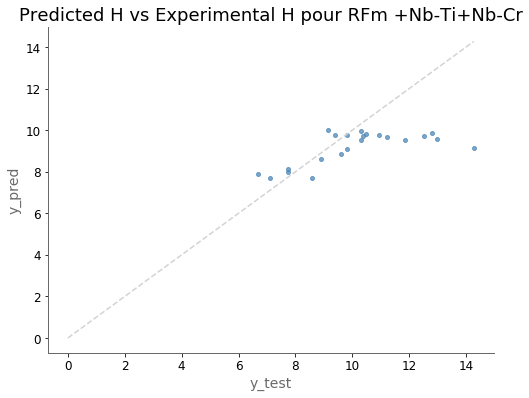

0.4324668159406575
0     1.426931
1     0.557423
2    -1.711283
3    -1.716084
4    -3.612673
5    -2.213047
6    -1.098940
7    -0.450710
8     0.377881
9     0.957671
10    1.374873
11    1.861926
12    2.891268
13    2.491910
14    2.164399
15    1.049059
16    1.586289
17    1.092170
18    1.028517
19    0.740664
20    0.835663
21    2.055210
Name: H, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


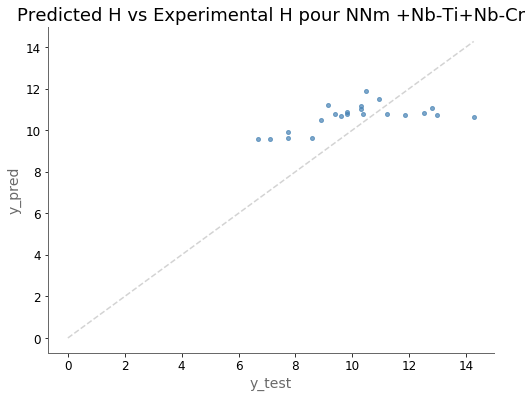

0.3325743367091386
0    -0.019234
1    -0.010181
2    -0.001614
3    -0.010076
4    -0.009667
5     0.011514
6    -0.021232
7     0.002524
8    -0.013188
9    -0.018591
10   -0.033256
11   -0.072169
12   -0.066469
13   -0.059890
14   -0.060295
15   -0.041693
16   -0.054945
17    0.072616
18    0.078923
19    0.068361
20    0.063764
21   -0.021392
Name: deltaH, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


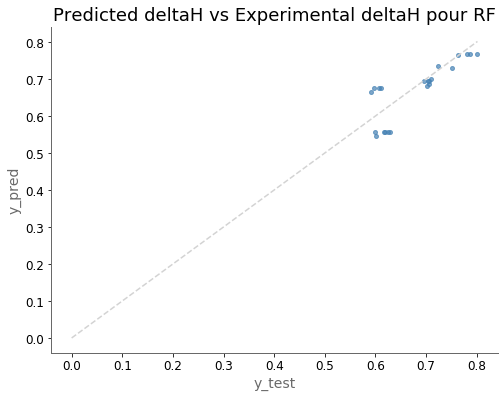

0.652494971776225
0     0.008183
1     0.021693
2     0.040395
3     0.036548
4     0.042754
5     0.049244
6     0.019956
7     0.016168
8     0.000710
9    -0.003748
10   -0.017290
11   -0.029725
12   -0.032440
13   -0.015071
14   -0.010633
15    0.003735
16   -0.032884
17   -0.047826
18   -0.063903
19   -0.012812
20    0.056598
21   -0.004272
Name: deltaH, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


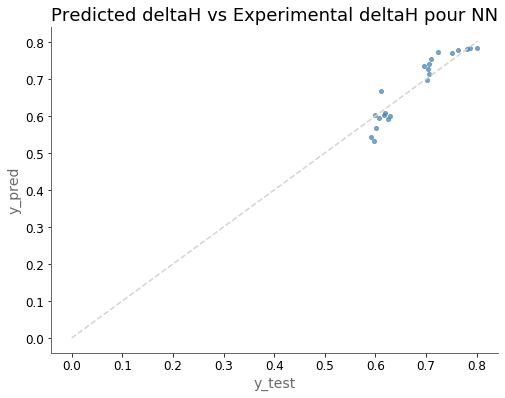

0.8854768380882907
0    -0.070323
1    -0.024244
2    -0.001099
3    -0.004100
4     0.003554
5     0.028355
6    -0.006122
7     0.002544
8    -0.012180
9    -0.018008
10   -0.031368
11   -0.042465
12   -0.050134
13   -0.054496
14   -0.059795
15   -0.038153
16   -0.060281
17   -0.094938
18   -0.072742
19   -0.028358
20   -0.002477
21   -0.086287
Name: deltaH, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


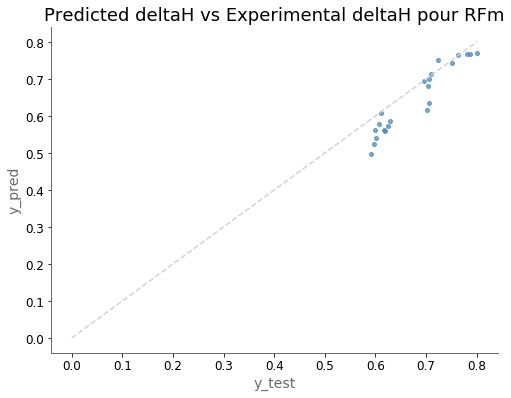

0.902028079769591
0    -0.035878
1    -0.002492
2     0.029728
3     0.038050
4     0.046845
5     0.049285
6     0.021435
7     0.014626
8    -0.001415
9    -0.006685
10   -0.020441
11   -0.067803
12   -0.064665
13   -0.059884
14   -0.065205
15   -0.041930
16   -0.076015
17   -0.062117
18   -0.047696
19   -0.024704
20    0.008552
21   -0.058086
Name: deltaH, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


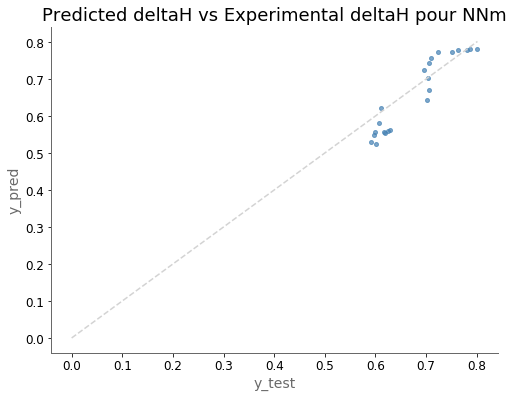

0.8871933148172836
0    -0.041837
1    -0.019429
2    -0.005570
3    -0.016349
4    -0.018787
5     0.014795
6    -0.027181
7    -0.002957
8    -0.017858
9    -0.024013
10   -0.038069
11   -0.037283
12   -0.041038
13   -0.044858
14   -0.045257
15   -0.026750
16   -0.035266
17    0.046481
18    0.067621
19    0.047792
20    0.041160
21   -0.040310
Name: deltaH, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


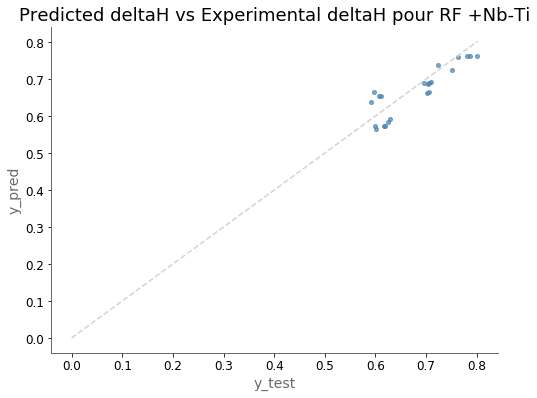

0.7625525530225887
0    -0.009657
1     0.009336
2     0.030683
3     0.028362
4     0.033047
5     0.035072
6     0.006299
7     0.000341
8    -0.015500
9    -0.020152
10   -0.033511
11   -0.024573
12   -0.015229
13   -0.007657
14   -0.008452
15    0.010217
16    0.008440
17    0.025356
18    0.037120
19    0.042564
20    0.056990
21   -0.020719
Name: deltaH, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


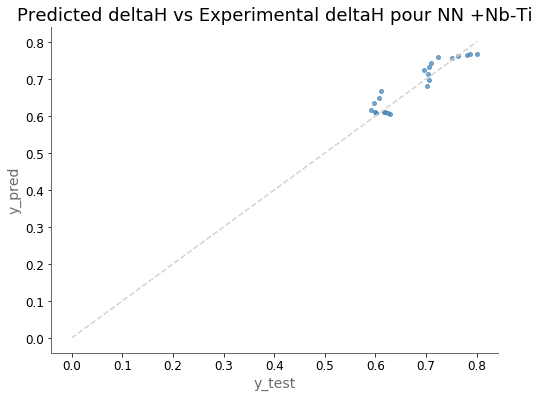

0.8649019197309966
0    -0.099701
1    -0.074900
2    -0.032855
3    -0.033798
4    -0.020717
5     0.018781
6    -0.015156
7    -0.003957
8    -0.020148
9    -0.025591
10   -0.040369
11   -0.038288
12   -0.031104
13   -0.042275
14   -0.037303
15   -0.022664
16   -0.028689
17   -0.017227
18   -0.010836
19   -0.008982
20   -0.009994
21   -0.092311
Name: deltaH, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


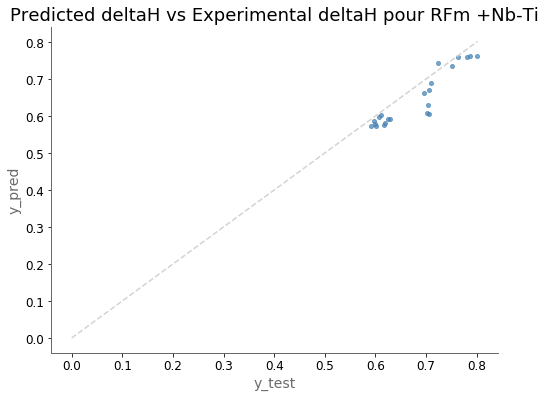

0.8529049899975707
0    -0.038976
1    -0.002438
2     0.030833
3     0.035380
4     0.044193
5     0.045429
6     0.016672
7     0.010922
8    -0.005149
9    -0.010760
10   -0.025062
11   -0.033961
12   -0.032854
13   -0.032816
14   -0.043751
15   -0.015829
16   -0.044749
17   -0.033939
18   -0.036136
19   -0.023776
20    0.002922
21   -0.065068
Name: deltaH, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


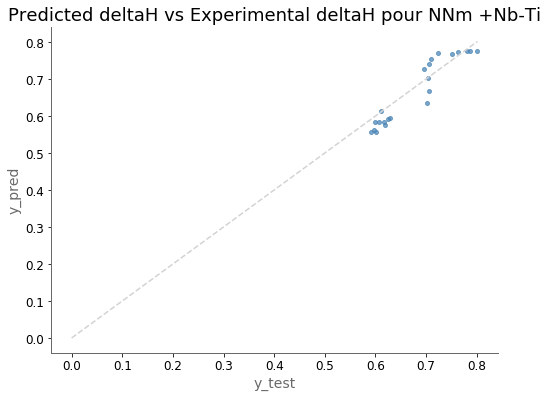

0.8924746225842433
0    -0.044282
1    -0.035125
2    -0.022786
3    -0.031776
4    -0.027015
5     0.020672
6    -0.017654
7    -0.001831
8    -0.018877
9    -0.025326
10   -0.040440
11   -0.053727
12   -0.048147
13   -0.059411
14   -0.059502
15   -0.041304
16   -0.049885
17    0.063534
18    0.067306
19    0.042379
20    0.036863
21   -0.045951
Name: deltaH, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


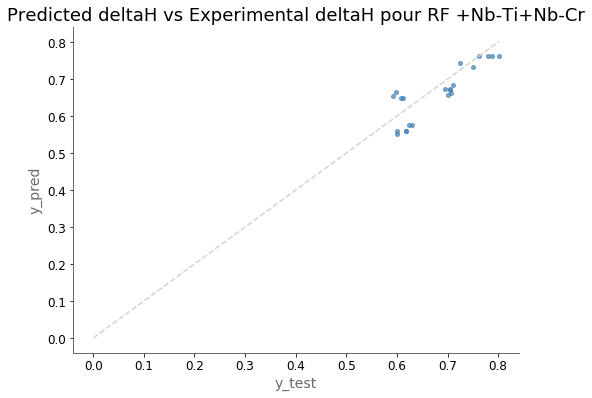

0.7115477163365898
0    -0.094633
1    -0.052739
2    -0.032620
3    -0.037527
4    -0.012039
5     0.027186
6    -0.006792
7    -0.000302
8    -0.016809
9    -0.022475
10   -0.036915
11   -0.010282
12   -0.008550
13   -0.032971
14   -0.032738
15   -0.016716
16   -0.025461
17   -0.005094
18   -0.025032
19   -0.019825
20   -0.018351
21   -0.102238
Name: deltaH, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


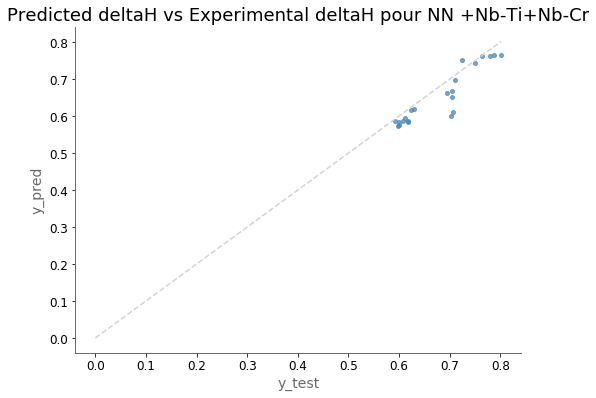

0.8464275611564339
0    -0.026425
1    -0.001309
2     0.022480
3     0.026775
4     0.048527
5     0.046181
6     0.017798
7     0.011183
8    -0.004861
9    -0.010226
10   -0.024215
11    0.020911
12    0.026836
13    0.032359
14    0.013276
15    0.049364
16   -0.000428
17    0.005247
18    0.004385
19    0.006541
20    0.018024
21   -0.055073
Name: deltaH, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


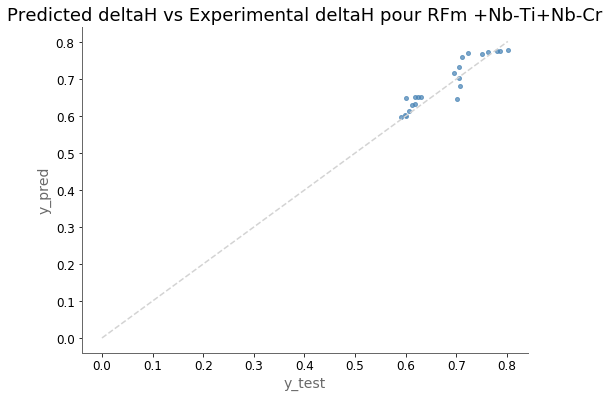

0.8646714818436856
0    -0.054839
1    -0.017432
2     0.015089
3     0.018818
4     0.027734
5     0.028067
6    -0.000668
7    -0.006722
8    -0.022699
9    -0.027885
10   -0.041777
11   -0.046957
12   -0.043624
13   -0.039762
14   -0.049841
15   -0.022508
16   -0.055698
17   -0.061599
18   -0.068524
19   -0.052211
20   -0.010330
21   -0.072118
Name: deltaH, dtype: float64


/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/elisegarel/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


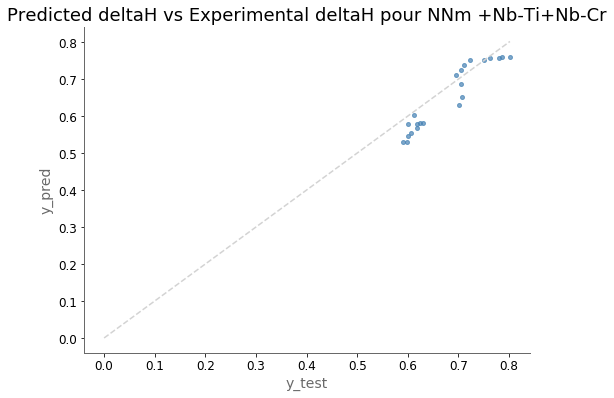

0.8945568348511145


RF        NN       RFm        NNm RF +Nb-Ti NN +Nb-Ti  \
E       0.769202  0.960123   0.96195   0.977433  0.880903  0.963043   
H       0.370279  0.490589  0.125718 -0.0363994  0.528666  0.170616   
deltaH  0.652495  0.885477  0.902028   0.887193  0.762553  0.864902   

       RFm +Nb-Ti NNm +Nb-Ti RF +Nb-Ti+Nb-Cr NN +Nb-Ti+Nb-Cr RFm +Nb-Ti+Nb-Cr  \
E        0.936995   0.981817        0.836362        0.928388         0.961835   
H        0.434626   0.614332            0.41        0.327765         0.432467   
deltaH   0.852905   0.892475        0.711548        0.846428         0.864671   

       NNm +Nb-Ti+Nb-Cr  
E              0.979363  
H              0.332574  
deltaH         0.894557

In [78]:
r2_adj_table=[]
validation_pred_list=[validation_RF,validation_NN,validation_RF_moy,validation_NN_moy,validation_RF_1binary,validation_NN_1binary,validation_RF_moy_1binary,validation_NN_moy_1binary,validation_RF_2binaries,validation_RF_moy_2binaries,validation_NN_2binaries,validation_NN_moy_2binaries]
outputs=['E','H','deltaH']
model_list=["RF","NN","RFm","NNm","RF +Nb-Ti","NN +Nb-Ti","RFm +Nb-Ti","NNm +Nb-Ti","RF +Nb-Ti+Nb-Cr","NN +Nb-Ti+Nb-Cr","RFm +Nb-Ti+Nb-Cr","NNm +Nb-Ti+Nb-Cr"]
df_r2_adj_models=pd.DataFrame(columns=outputs, index=model_list)
for output in outputs:
    # Dataframe to store the metrics of each training : initialisation with an empty column
    
    i=0
    for validation_pred in validation_pred_list:
        y_pred=validation_pred[output]
        y_test=validation_exp[output]
        print(y_pred-y_test)

        # Plot regression
        xy_max=0
        with plt.style.context(mplstyle):
            plt.figure(figsize=(8,6))
            plt.title('Predicted ' + output + ' vs Experimental ' + output+' pour '+model_list[i])
            plt.ylabel('y_pred')
            plt.xlabel('y_test')
            
            xy_max = max( max(y_pred), y_test.max(), xy_max )
            plt.plot(y_test,y_pred,linestyle='',marker='.', markersize=8, alpha=0.7)
        plt.plot([0,xy_max], [0,xy_max], '--', color='lightgray')
        plt.draw()
        #plt.savefig(save_regression, dpi=300)
        plt.show()

        #display(y_pred)
        corr_matrix = np.corrcoef(y_test,y_pred)
        corr = corr_matrix[0,1]
        R2 = corr**2
        R2_adj=1-((1-R2)*(len(y_test)-1))/(len(y_test)-1-1)
        print(R2_adj)
        
        df_r2_adj_models[output][model_list[i]]=R2_adj
                                                   
        i+=1

    
    
    
# Print table of evaluation of each model (mean and std of metrics)    
df_r2_adj_models=df_r2_adj_models.T
display(df_r2_adj_models)

# Save evaluations 
df_r2_adj_models.to_csv(path+"R2_adj.csv")                                                    

## Classification models

### Get paths for models to evaluate: stored results of iterative k-fold crossvalidation trainings (```run```) for different outputs (```classifications```)
Add prediction type : to compute the metrics we need only classes. If the prediction type is other, then we correct it.

In [63]:
validation_XRD=pd.read_csv(path+"validation_NN_class.csv",  header=0, names=['index', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr',"XRD" ]) 
experimental_XRD=pd.read_csv(path+"Database_XRD_validation.csv",header=0,names=['index', 'sample', 'Zr', 'Nb', 'Mo', 'Ti', 'Cr','Zr_m', 'Nb_m', 'Mo_m', 'Ti_m', 'Cr_m',"XRD" ])

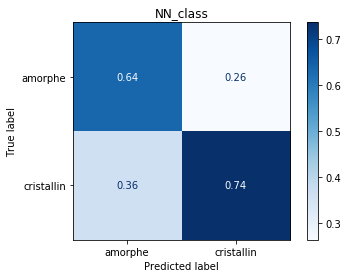

NN_class
accuracy               0.711111
recall amorphous         0.4375
precision amorphous    0.636364
F1 amorphous           0.518519
recall cristalline     0.862069
precision cristalline  0.735294
F1 cristalline         0.793651
F1 weighted                 NaN
Hamming loss           0.288889

In [64]:
# For each run/kind of models and each outputs/predictions

# Dataframe to store the mean and std of metrics for each model: : initialisation with an empty column
df_metrics=pd.DataFrame(columns=["NN_class"],
                                    index=['accuracy',
                                        'recall amorphous', 
                                        'precision amorphous',
                                        'F1 amorphous ',
                                        'recall cristalline ', 
                                        'precision cristalline',
                                        'F1 cristalline' ,
                                        'F1 weighted ',
                                        'Hamming loss '])

    

    
y_pred=validation_XRD["XRD"]
y_test=experimental_XRD["XRD"]

metrics =pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).T
            
amorph_key=metrics['recall'].keys()[0]
cryst_key=metrics['recall'].keys()[1]

df_metrics["NN_class"]["accuracy"]=metrics['precision']['accuracy']
df_metrics["NN_class"]["recall amorphous"]=metrics['recall'][amorph_key]
df_metrics["NN_class"]["precision amorphous"]=metrics['precision'][amorph_key]
df_metrics["NN_class"]["F1 amorphous "]=metrics['f1-score'][amorph_key]
df_metrics["NN_class"]['recall cristalline ']=metrics['recall'][cryst_key]
df_metrics["NN_class"]['precision cristalline']=metrics['precision'][cryst_key]
df_metrics["NN_class"]['F1 cristalline']=metrics['f1-score'][cryst_key]
df_metrics["NN_class"]['F1 weighted']=metrics['f1-score']['weighted avg']
df_metrics["NN_class"]['Hamming loss ']=hamming_loss(y_test, y_pred)


            
                                

# Plot confusion matrix from all expected and predicted values.                                    
cm = confusion_matrix( y_test, y_pred, normalize="pred")

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['amorphe','cristallin'])
disp.plot(cmap='Blues')
plt.title('NN_class')
plt.savefig(path+"matrice", dpi=600)
plt.show()    
#i+=1


# Print table of evaluation of each model (mean and std of metrics)

display(df_metrics)

# Save metrics mean and std 
df_metrics.to_csv(path+"metriques.csv")  
